In [1]:
import sys
sys.path.append("../src")

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import sys
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from pytorch_impl.nns import ResNet
from pytorch_impl.nns import warm_up_batch_norm
from pytorch_impl.estimators import LinearizedSgdEstimator
from pytorch_impl import ClassifierTraining

In [ ]:
num_classes = 10

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

cifar10_stats = {
    "mean" : (0.4914, 0.4822, 0.4465),
    "std"  : (0.24705882352941178, 0.24352941176470588, 0.2615686274509804),
}

transform_train = transforms.Compose([
    transforms.Lambda(lambda x: np.asarray(x)),
    transforms.Lambda(lambda x: np.pad(x, [(4, 4), (4, 4), (0, 0)], mode='reflect')),
    transforms.Lambda(lambda x: Image.fromarray(x)),
    transforms.RandomCrop(32),
    
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(cifar10_stats['mean'], cifar10_stats['std']),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar10_stats['mean'], cifar10_stats['std']),
])

train_loader = torch.utils.data.DataLoader(
                  datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train),
               batch_size=8, shuffle=True, pin_memory=True)

test_loader  = torch.utils.data.DataLoader(
                  datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test),
               batch_size=8, shuffle=True, pin_memory=True)

device

Files already downloaded and verified
Files already downloaded and verified


device(type='cuda', index=0)

In [ ]:
model = ResNet(1).to(device)
model = warm_up_batch_norm(model, train_loader, device, limit=30)

BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d
BatchNorm2d


In [ ]:
estimator = LinearizedSgdEstimator(model, num_classes, nn.CrossEntropyLoss(), 0.01)
training  = ClassifierTraining(estimator, device)

epoch 0/5, 0s since start


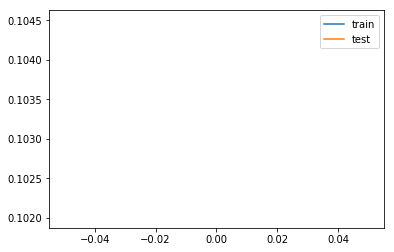

epoch 1/5, 150s since start


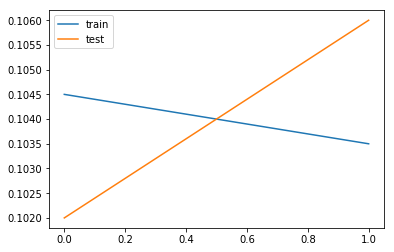

epoch 2/5, 295s since start


In [ ]:
training.train(train_loader, test_loader, num_epochs=5, learning_rate=0.01)